# Problema de Clasificación Supervisada

Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importar los Datos

In [2]:
df_ = pd.read_csv("Iris.csv")

Comprobar DataFrame

In [3]:
df_

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


¿Cuales Son las Variables?

In [4]:
df_.columns.to_list()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

# Estas son las Variables
* Id: Número identificador - se encuentra demás. 
* SepalLengthCm: Largo de Sepalo en cm
* SepalWidthCm: Ancho del Sépalo en cm
* PetalLengthCm: Largo del Petalo en cm
* PetalWidthCm: Ancho del pétalo en cm.
* Species: Specie a la que pertenece. 

In [5]:
#Eliminamos la columna innecesaria Id
df_.drop(columns=["Id"],inplace=True)

¿Cual es la información del DataSet?

In [6]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* Tenemos 150 registros
* Un total de 5 columnas significativas
* 4 de ellas contienn datos de tipo flotante
* Por último el tipo de especie parace ser un string. 
* No existen datos faltantes.

¿Que propiedades estadísticos nos provee el dataframe?

In [7]:
df_.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df_.describe(include=["O"])

,Species
count,150
unique,3
top,Iris-setosa
freq,50


* Contamos con 3 especies en el dataset
* El que más se repite es la especie iris-setosa
* Esto se da con una frecuencia de 50, la tercera parte del dataset. 

In [9]:
#¿Cuántas plantas por especie existen en nuestro set de datos?
df_.groupby(["Species"]).size() #Agrupo por "" y aplico tamaño. 

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

* Para cada especie en el conjunto de datos existe la misma cantidad de plantas: 50

# Graficamos

In [10]:
df_.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Lo Primero graficamos que relación existe entre la longitud y ancho del sépalo

In [11]:
#Obtener el nombre de las especies. 
df_["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Gráfico entero para Constrastar

Text(0.5, 1.0, 'Grafico de Longitud vs Anchura (Sepalo-cm)')

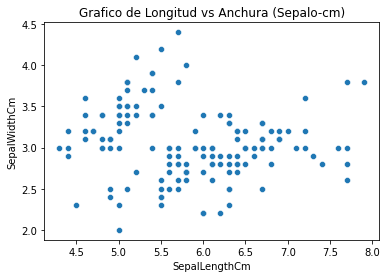

In [12]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=df_)
plt.title("Grafico de Longitud vs Anchura (Sepalo-cm)")

* Si bien tenemos la distribución de Longitud vs Anchura de sépalo no es complicadisimo reconocer como las especies están involucradas.
* Lo mejor sera separarlar y graficarlas en conjunto. 

In [13]:
#elaboración de condiciones
iris_setosa = df_["Species"] == "Iris-setosa"
iris_versicolor = df_["Species"] == "Iris-versicolor"
iris_virginica = df_["Species"] == "Iris-virginica"

# Gráfico Separado por Especies

Text(0.5, 1.0, 'Sépalo - Longitud vs Anchura')

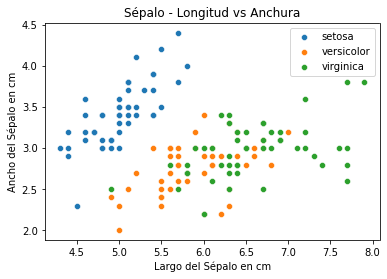

In [14]:
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=df_[iris_setosa],label ="setosa")
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=df_[iris_versicolor],label="versicolor")
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm",data=df_[iris_virginica],label="virginica")
plt.ylabel("Ancho del Sépalo en cm")
plt.xlabel("Largo del Sépalo en cm")
plt.title("Sépalo - Longitud vs Anchura")

* La gráfica nos muestra una distribución interesante, dado a que podemos reconocer de inmediato por esta relación la especie setosa
* Sin embargo en el caso de la especie versicolor y virginica, se encuentra algo difuso el reconocimiento. 

# Hacemos lo mismo con los pétalos

In [15]:
df_.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Gráfico en Conjunto - Largo vs Ancho - Pétalos

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

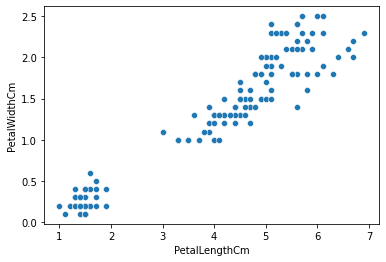

In [16]:
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=df_)

* Nuevamente lo más recomendable será dividirlo por especies

In [17]:
#elaboración de condiciones
iris_setosa = df_["Species"] == "Iris-setosa"
iris_versicolor = df_["Species"] == "Iris-versicolor"
iris_virginica = df_["Species"] == "Iris-virginica"

Text(0, 0.5, 'Ancho del Pétalos en cm')

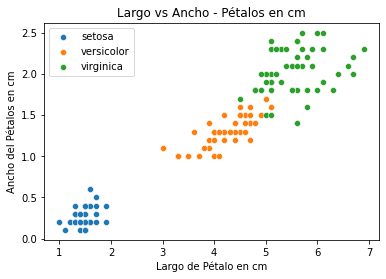

In [18]:
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=df_[iris_setosa],label = "setosa")
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=df_[iris_versicolor],label="versicolor")
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm",data=df_[iris_virginica],label="virginica")
plt.title("Largo vs Ancho - Pétalos en cm")
plt.xlabel("Largo de Pétalo en cm")
plt.ylabel("Ancho del Pétalos en cm")

* Existe una relación mucho más uniforme, posiblemente estos datos sean los indicados para someterlos a un modelo clasificador. 
* Sumamente interesante que esta relación sea de gran ayuda. 

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

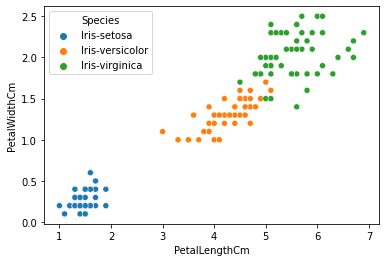

In [86]:
#Forma alternativa
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df_) #Hue es como la leyenda, que sera las categorías.

# Librerías de Modelos Machine Learning

In [19]:
#Te presento algunos algoritmos de clasificacion
from sklearn.model_selection import train_test_split #Dividir datos de entreno
from sklearn.linear_model import LogisticRegression #Regresion logística
from sklearn.svm import SVC #Máquinas de Vectores de Soporte
from sklearn.neighbors import KNeighborsClassifier #Vecinos más cercanos- classifi
from sklearn.tree import DecisionTreeClassifier #Arboles de Decision.

* Atención: Podemos emplear todos los datos para clasificar pero también podemos solo emplear los datos que a nosotros nos parezcan más relevantes!!

In [20]:
#Variables independientes - 150 x 4
#Obtienes un arreglo que involucra a todos los datos menos "especies" - (1)
X = np.array(df_.drop(["Species"],1))
#Variables Dependientes. - 150 x 1 
#Obtienes un arreglo que contiene cada especie, según el conjunto de datos. 
y = np.array(df_["Species"])

C:\Users\User\AppData\Local\Temp\ipykernel_7180\2777457259.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_.drop(["Species"],1))


Obteniendo datos de entrenamiento y prueba

In [21]:
#Datos de entrenamiento y datos de testeo
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

1.- Modelo de Regresión Logística

In [22]:
#Definimos el algoritmo
algoritmo = LogisticRegression()
#Lo entrenamos, proporcionale X_entrenamiento y Y_entrenamiento
algoritmo.fit(X_train,y_train)
#Enuna variable de prediciones, usamos nuestro algoritmo para predecir desde X_test
y_pred = algoritmo.predict(X_test) #Esto no es Y_test
#Y_test se usa para comprobar. 

#El puntaje sirve para ver que tan exacto es nuestro modelo. 
#Es aplicable a (X_train,y_train) y a (X_test,y_test) y_pred son las predicciones.
print("Conseguimos un puntaje de con datos de entrenamiento",algoritmo.score(X_train,y_train))
print("Conseguimos un puntaje de con datos de testeo",algoritmo.score(X_test,y_test))

Conseguimos un puntaje de con datos de entrenamiento 0.975
Conseguimos un puntaje de con datos de testeo 0.9


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ejemplo de Predicción Puntual

In [23]:
#Doble Corchete para obtener un resultado de tu prediccion.
algoritmo.predict(X=[[5,3.4,1.3,0.15]])

array(['Iris-setosa'], dtype=object)

# Modelo de Máquinas de Vectores de Soporte

In [24]:
#Definimos el modelo
algoritmo = SVC()
#Entrenamos al modelo
algoritmo.fit(X_train,y_train)
#Predecimos
y_pred = algoritmo.predict(X_test)
#Valoramos la predicción.
print("La predicción de este modelo tiene un puntaje como este en su version de entrenamiento",algoritmo.score(X_train,y_train))
print("La predicción obtiene un puntaje como este con sus datos de testeo",algoritmo.score(X_test,y_test))

La predicción de este modelo tiene un puntaje como este en su version de entrenamiento 0.9666666666666667
La predicción obtiene un puntaje como este con sus datos de testeo 0.9


Modelo K vecinos más cercanos

In [25]:
#Definimos el Modelo - en este caso podemos definir un parámetro
algoritmo = KNeighborsClassifier(n_neighbors=4)
#Lo entrenamos
algoritmo.fit(X_train,y_train)
#Obtenemos las predicciones
y_pred = algoritmo.predict(X_test)
#Obtenemos los puntajes
print("Para el conjunto de datos de entrenamiento:",algoritmo.score(X_train,y_train))
print("Para el testeo obtienes un puntaje de: ",algoritmo.score(X_test,y_test))

Para el conjunto de datos de entrenamiento: 0.975
Para el testeo obtienes un puntaje de:  0.9


Arboles de Decision - Clasificador

In [26]:
#Definimos el modelo:
algoritmo = DecisionTreeClassifier()
#Lo entrenamos
algoritmo.fit(X_train,y_train)
#Tenemos nuestra columna de predicciones
y_pred = algoritmo.predict(X_test)
#Obtenemos los puntajes
print("Arbol de Decision, tiene un puntaje en entrenamiento de: ",algoritmo.score(X_train,y_train))
print("Arbol de Decision, tiene un puntaje en testeo de: ",algoritmo.score(X_test,y_test))

Arbol de Decision, tiene un puntaje en entrenamiento de:  1.0
Arbol de Decision, tiene un puntaje en testeo de:  0.8666666666666667


Modelo a Base de "Sépalos"

In [27]:
df_

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
X = np.array(df_[["SepalLengthCm","SepalWidthCm"]])
y = np.array(df_["Species"])

# Algoritmos de Clasificacion

In [33]:
#Te presento algunos algoritmos de clasificacion
from sklearn.model_selection import train_test_split #Dividir datos de entreno
from sklearn.linear_model import LogisticRegression #Regresion logística
from sklearn.svm import SVC #Máquinas de Vectores de Soporte
from sklearn.neighbors import KNeighborsClassifier #Vecinos más cercanos- classifi
from sklearn.tree import DecisionTreeClassifier #Arboles de Decision.

In [34]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Regresión Logística

In [52]:
#Definimos el modelo
algoritmo = LogisticRegression()
#Entrenamos
algoritmo.fit(X_train,y_train)
#Obtenemos la predicción
y_pred = algoritmo.predict(X_test)
#Obtenemos la putuación
print("Putuación Entrenamiento:",algoritmo.score(X_train,y_train))
print("Puntuación Testeo", algoritmo.score(X_test,y_test))

Putuación Entrenamiento: 0.8
Puntuación Testeo 0.8666666666666667


# Máquinas Vectores de Soporte

In [53]:
#Definimos el Modelo
algoritmo = SVC()
#Entrenamos
algoritmo.fit(X_train,y_train)
#Obtenemos la prediccion
y_pred = algoritmo.predict(X_test)
#Obtenemos la puntuacion
print("Puntuacion entrenamiento",algoritmo.score(X_train,y_train))
print("Puntuación Testeo:",algoritmo.score(X_test,y_test))


Puntuacion entrenamiento 0.7833333333333333
Puntuación Testeo: 0.8333333333333334


# Vecinos más cercanos

In [61]:
#Definimos el Modelo
algoritmo = KNeighborsClassifier(n_neighbors=5)
#Lo entrenamos
algoritmo.fit(X_train,y_train)
#Obtenemos la prediccion
y_pred = algoritmo.predict(X_test)
#Imprimimos los scores
print("Puntuación de Entrenamiento",algoritmo.score(X_train,y_train))
print("Puntuación de Testeo",algoritmo.score(X_test,y_test))

Puntuación de Entrenamiento 0.8333333333333334
Puntuación de Testeo 0.8333333333333334


# Arboles de Decisión - Clasificador

In [63]:
#Definimos del Modelo
algoritmo = DecisionTreeClassifier()
#Entrenamos
algoritmo.fit(X_train,y_train)
#Obtenemos predicciones
y_pred = algoritmo.predict(X_test)
#obtenemos la puntuacion
print("Entrenamiento puntuacion",algoritmo.score(X_train,y_train))
print("Testeo puntuacion",algoritmo.score(X_test,y_test))

Entrenamiento puntuacion 0.9416666666666667
Testeo puntuacion 0.7666666666666667


In [65]:
df_.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Modelo pero empleando solo Pétalos

In [66]:
X = np.array(df_[["PetalLengthCm","PetalWidthCm"]])
y = np.array(df_["Species"])

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Modelo Regresión Logística

In [74]:
#Definimos el modelo
algoritmo = LogisticRegression()
#Lo entrenamos
algoritmo.fit(X_train,y_train)
#Obtenemos la prediccion
y_pred = algoritmo.predict(X_test)
#Obtenemos la puntuacion
print("Puntuación de Entrenamiento",algoritmo.score(X_train,y_train))
print("Testeo Puntuación",algoritmo.score(X_test,y_test))

Puntuación de Entrenamiento 0.95
Testeo Puntuación 1.0


# Modelo de Máquinas Vectores de Soporte

In [75]:
#Definimos el Modelo
algoritmo = SVC()
#Entrenamos el modelo
algoritmo.fit(X_train,y_train)
#Obtenemos la prediccion
y_pred = algoritmo.predict(X_test)
#Obtenemos la puntuación
print("Puntuación Entrenamiento",algoritmo.score(X_train,y_train))
print("Puntuación de Testeo",algoritmo.score(X_test,y_test))

Puntuación Entrenamiento 0.95
Puntuación de Testeo 0.9666666666666667


# Modelo Vecinos Cercanos

In [83]:
#Definimos el Modelo
algoritmo = KNeighborsClassifier(n_neighbors=5)
#Entrenamos el modelo
algoritmo.fit(X_train,y_train)
#Obtenemos la prediccion
y_pred = algoritmo.predict(X_test)
#Obtenemos la puntuación
print("Puntuación de Entrenamiento",algoritmo.score(X_train,y_train))
print("Puntuación de Testeo",algoritmo.score(X_test,y_test))

Puntuación de Entrenamiento 0.9583333333333334
Puntuación de Testeo 1.0


# Modelo Arboles de Decision

In [84]:
#Definimos el Modelo
algoritmo = DecisionTreeClassifier()
#Entrenamos el modelo
algoritmo.fit(X_train,y_train)
#Obtenemos la prediccion
y_pred = algoritmo.predict(X_test)
#Obtenemos la puntuación
print("Puntuación de Entrenamiento",algoritmo.score(X_train,y_train))
print("Puntuación de Testeo",algoritmo.score(X_test,y_test))

Puntuación de Entrenamiento 0.9916666666666667
Puntuación de Testeo 0.9333333333333333
